In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import layers
import matplotlib.pyplot as plt
import cv2

# Loading the dataset from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Images downloaded from pexels 
from keras.preprocessing.image import ImageDataGenerator
train_path = '/content/drive/MyDrive/Apple Strawverries'
train_gen = ImageDataGenerator()
train  = train_gen.flow_from_directory(directory = train_path,class_mode = 'categorical',batch_size=15,target_size = (60, 60))

Found 53 images belonging to 2 classes.


# Reading the first batch and display random images with their labels

In [4]:
train_images,train_labels = train.next()

In [9]:
text_labels = ["apple","strawberry",]

In [10]:
train_labels_vec = np.argmax(train_labels,axis=1)
train_labels_vec

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

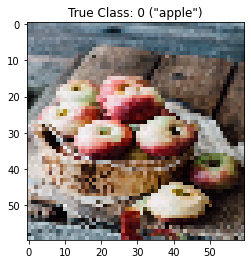

In [13]:
random_index = np.random.randint(0, 15)
numerical_label = train_labels_vec[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label,text_description))
plt.imshow(train_images[random_index ,:,:,:].astype("uint8"))

# Building the CNN model

In [14]:
num_classes = 2
image_width = 60
image_height = 60
num_channels = 3

In [15]:
def build_model():
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same',input_shape=(image_height, image_width, num_channels) )) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
model = build_model()

In [16]:
history = model.fit_generator(train, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
4/4 [==============================] - 31s 7s/step - loss: 46.6430 - accuracy: 0.5094
Epoch 2/10
4/4 [==============================] - 18s 4s/step - loss: 12.7969 - accuracy: 0.5094
Epoch 3/10
4/4 [==============================] - 19s 4s/step - loss: 3.0394 - accuracy: 0.5283
Epoch 4/10
4/4 [==============================] - 20s 6s/step - loss: 1.1346 - accuracy: 0.6604
Epoch 5/10
4/4 [==============================] - 19s 5s/step - loss: 0.3999 - accuracy: 0.7925
Epoch 6/10
4/4 [==============================] - 18s 5s/step - loss: 0.2697 - accuracy: 0.8868
Epoch 7/10
4/4 [==============================] - 19s 5s/step - loss: 0.2461 - accuracy: 0.9057
Epoch 8/10
4/4 [==============================] - 18s 4s/step - loss: 0.1607 - accuracy: 0.9811
Epoch 9/10
4/4 [==============================] - 18s 4s/step - loss: 0.1313 - accuracy: 0.9811
Epoch 10/10
4/4 [==============================] - 18s 4s/step - loss: 0.0850 - accuracy: 1.0000


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

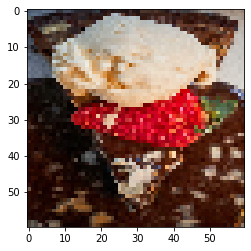

In [18]:
image=cv2.imread('aaa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(60,60))
plt.imshow(image)

In [20]:
print(model.predict(image.reshape(-1,60,60,3)))
print(text_labels)

[[0.57274026 0.42725974]]
['apple', 'strawberry']


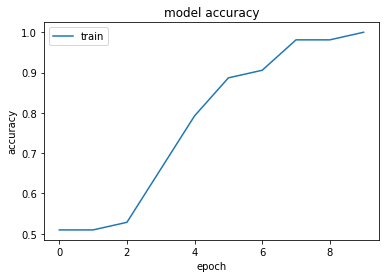

In [21]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Data augmentation

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom((0.4, 0.5)),
  #layers.RandomContrast((0.1, 0.2))
])

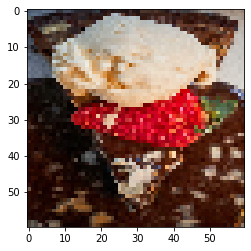

In [25]:
image=cv2.imread('aaa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(60,60))
plt.imshow(image)

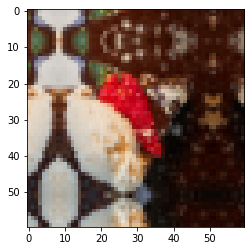

In [26]:

plt.imshow(data_augmentation(image).numpy().astype("uint8"))

In [28]:
def build_model_augmented():
    model = Sequential()
    model.add(data_augmentation)
    model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same',input_shape=(image_height, image_width, num_channels) )) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
model_aug = build_model_augmented()

In [29]:
history = model_aug.fit(train, epochs=12)

Epoch 1/12
4/4 [==============================] - 20s 5s/step - loss: 130.5120 - accuracy: 0.4340
Epoch 2/12
4/4 [==============================] - 19s 5s/step - loss: 24.3333 - accuracy: 0.3774
Epoch 3/12
4/4 [==============================] - 19s 5s/step - loss: 8.7623 - accuracy: 0.5094
Epoch 4/12
4/4 [==============================] - 18s 4s/step - loss: 2.0681 - accuracy: 0.5660
Epoch 5/12
4/4 [==============================] - 18s 4s/step - loss: 1.2919 - accuracy: 0.5472
Epoch 6/12
4/4 [==============================] - 18s 4s/step - loss: 1.0274 - accuracy: 0.6981
Epoch 7/12
4/4 [==============================] - 18s 4s/step - loss: 0.8392 - accuracy: 0.5849
Epoch 8/12
4/4 [==============================] - 18s 4s/step - loss: 0.7321 - accuracy: 0.5849
Epoch 9/12
4/4 [==============================] - 18s 4s/step - loss: 0.6991 - accuracy: 0.5660
Epoch 10/12
4/4 [==============================] - 18s 4s/step - loss: 0.7452 - accuracy: 0.6226
Epoch 11/12
4/4 [===================

[[0.48866984 0.5113302 ]]
['apple', 'strawberry']


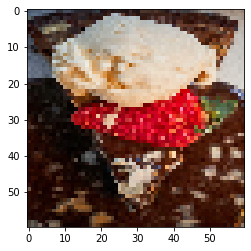

In [31]:
plt.imshow(image)
print(model_aug.predict(image.reshape(-1,60,60,3)))
print(text_labels)

[[0.5815504  0.41844952]]
['apple', 'strawberry']


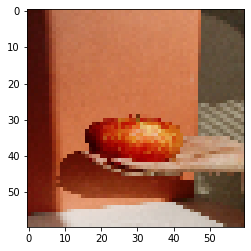

In [34]:
image=cv2.imread('bb.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(60,60))
plt.imshow(image)
print(model_aug.predict(image.reshape(-1,60,60,3)))
print(text_labels)

# Transfer learning with VGG16

In [47]:
train_gen = ImageDataGenerator()
train  = train_gen.flow_from_directory(directory = train_path,class_mode = 'categorical',batch_size=53,target_size = (60, 60))

train_images,train_labels = train.next()

Found 53 images belonging to 2 classes.


In [48]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Load VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= train_images[0].shape) 
base_model.trainable = False ##weights not trainable

train_ds = preprocess_input(train_images) 


In [49]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 60, 60, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 60, 60, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 30, 30, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 30, 30, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 30, 30, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 15, 15, 128)       0     

In [50]:
model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax'),
])

In [51]:
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = model_transfer.fit(train_images,train_labels, epochs=12)

Epoch 1/12
2/2 [==============================] - 2s 651ms/step - loss: 4.2878 - accuracy: 0.4528
Epoch 2/12
2/2 [==============================] - 2s 649ms/step - loss: 1.4018 - accuracy: 0.8113
Epoch 3/12
2/2 [==============================] - 2s 648ms/step - loss: 0.5843 - accuracy: 0.9434
Epoch 4/12
2/2 [==============================] - 2s 644ms/step - loss: 0.2310 - accuracy: 0.9623
Epoch 5/12
2/2 [==============================] - 2s 632ms/step - loss: 0.1101 - accuracy: 0.9811
Epoch 6/12
2/2 [==============================] - 2s 645ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 7/12
2/2 [==============================] - 2s 646ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 8/12
2/2 [==============================] - 2s 975ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 9/12
2/2 [==============================] - 2s 666ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/12
2/2 [==============================] - 2s 642ms/step - loss: 8.1179e-04 - accuracy: 1.0000
Epoch 11/12
2/2

[[0.7188246  0.28117535]]
['apple', 'strawberry']


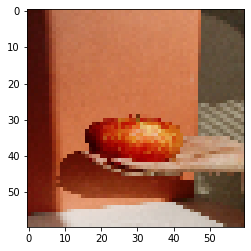

In [55]:
image=cv2.imread('bb.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(60,60))
plt.imshow(image)
print(model_transfer.predict(image.reshape(-1,60,60,3)))
print(text_labels)